<a href="https://colab.research.google.com/github/souadsoo/gitgit/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

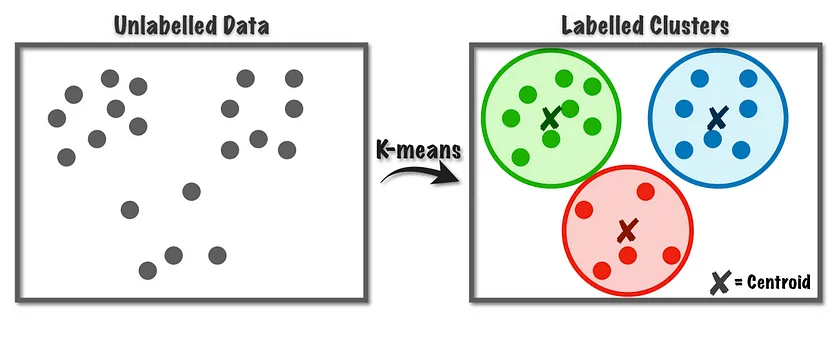

# ***INTRODUCTION:***

K-Means :
K-means is part of “Unsupervised learning” ,It’s an interatif algorithm of clustering and it’s based on centroid; it does regroup our data in groups/clusters

It is way more specific than CAH
The K in K-means is k clusters we want to identify
Means = The Mean of a cluster
The machine chooses in a random way some points as clusters

It would count the means between the dots  with the mean WITHIN A cluster
And those means become the new dots

We will keep counting the means between the dots UNTIL the distances between the dots are EQUAL to one another.
With elbow Method we call tell which K is the best
The Elbow Method

The idea of the Elbow method is to run k-means clustering on the dataset for a range of values of k, and for each value of k calculate SSE.
In this example we have chosen K=3 as the best K-value.

Model=Kmeans(n_clusters=k ,n-init=10 )
number of times we will find the centroid of each cluster


# **Qu’est-ce que StandardScaler ?**
C’est une méthode pour "mettre à l’échelle" vos données afin qu’elles soient plus faciles à utiliser dans les modèles d’apprentissage automatique.



### Pourquoi en avons-nous besoin ?

Imagine que tu as des données comme :

- **La taille** (en centimètres) : 160, 170, 180
- **Le poids** (en kilogrammes) : 60, 70, 80

Le problème, c’est que ces deux colonnes n’ont pas la **même échelle** :
- La taille est autour de **centaines**.
- Le poids est autour de **dizaines**.

Si tu donnes ces données à un modèle d’apprentissage automatique, il risque de penser que **la taille est plus importante que le poids**, simplement parce que les chiffres sont plus grands. Cela peut **fausser les résultats**.

---

### Exemple :

Prenons un modèle qui calcule une distance entre les points pour les classer (comme K-Nearest Neighbors) :

- Un écart de 10 cm dans la taille (de 170 à 180) semblera **beaucoup plus grand** qu’un écart de 10 kg dans le poids (de 70 à 80).
- Pourtant, ces deux différences pourraient avoir la **même importance réelle**.

---



### Solution : StandardScaler

`StandardScaler` ajuste les données pour qu’elles soient **sur la même échelle** :
- Chaque colonne a une **moyenne de 0**.
- Chaque colonne a une **écart-type de 1**.
Ainsi, les modèles comparent correctement les caractéristiques, sans être influencés par leurs valeurs initiales.


In [ ]:
from sklearn.preprocessing import StandardScaler
#Avant d'appeler les models on doit faire le preprocessing de notre données vu que:
#K-means est sensible aux distances entre les données,
#on peut l'utiliser pour le KNN et tout model qui se base sur le calcul des distances.
# Exemple de données
data = [[180, 80], [160, 60], [170, 70]]

# Créer un objet StandardScaler
scaler = StandardScaler()

# Calculer les paramètres (moyenne, écart-type) et transformer les données
data_standardized = scaler.fit_transform(data)

print(data_standardized)

[[ 1.22474487  1.22474487]
 [-1.22474487 -1.22474487]
 [ 0.          0.        ]]


# **Libraries call:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:

profile = ProfileReport(data)
profile.to_file("Mall Constomers")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:379: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#DATA CLEANING: il n'y a pas de cellule vides
data.fillna('')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data1=data.drop(['CustomerID','Gender'],axis=1)
data1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
scdata1=StandardScaler()
data1_std=scdata1.fit_transform(data1.astype(float))
data1_std

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

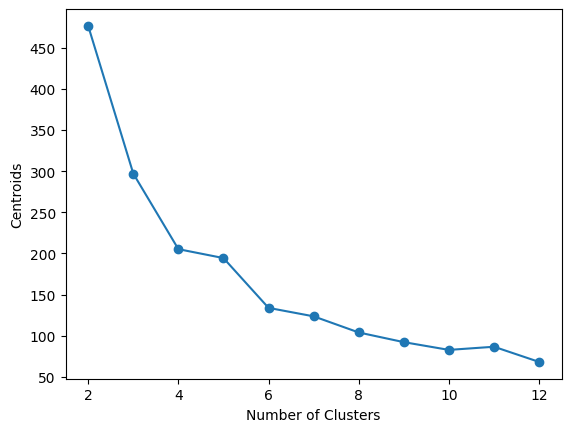

In [ ]:
#K_means
cluster_range=[2,3,4,5,6,7,8,9,10,11,12]
centroid=[]
for c in cluster_range:
  model=KMeans(n_clusters=c,init='k-means++')
  model.fit(data1_std)
  centroid.append(model.inertia_)

plt.Figure()
plt.plot(cluster_range,centroid,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Centroids')
plt.show()

### La propriété inertia_ dans l'objet KMeans de la bibliothèque Scikit-learn représente la somme des distances au carré entre chaque point et le centroïde de son cluster. En d'autres termes, elle mesure la compacité des clusters. Un score plus bas indique que les points sont plus proches de leurs centroïdes respectifs, ce qui suggère une meilleure partition des données (dans le cadre de KMeans).

In [ ]:
model=KMeans(n_clusters=3).fit(data1_std)
Etiquette=model.labels_ #Labels : etiquette de chaque cluster
new_data1=pd.DataFrame(data=data1_std,columns=['Annual Income (k$)','Age','Cluster'])
new_data1['Cluster']=Etiquette
new_data1

,Annual Income (k$),Age,Cluster
0,-1.424569,-1.738999,1
1,-1.281035,-1.738999,1
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,1
4,-0.563369,-1.662660,0
...,...,...,...
195,-0.276302,2.268791,1
196,0.441365,2.497807,2
197,-0.491602,2.497807,1
198,-0.491602,2.917671,2


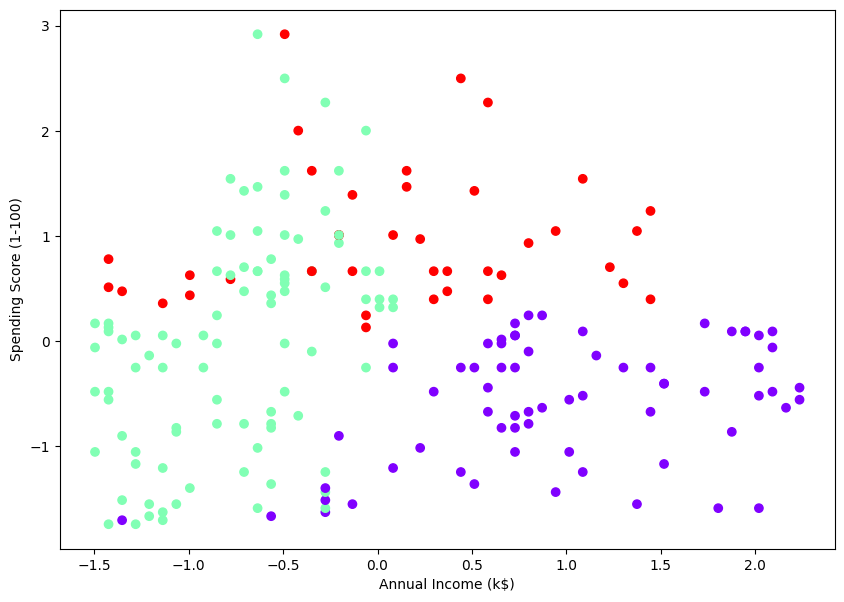

In [ ]:
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_data1['Annual Income (k$)'],new_data1['Age'],c=new_data1['Cluster'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

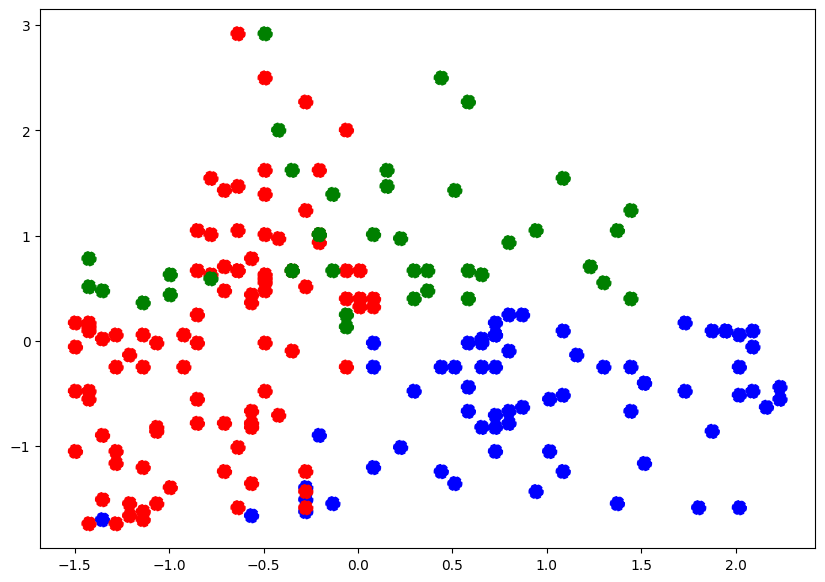

In [ ]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_data1['Annual Income (k$)'][new_data1['Cluster']==0],new_data1['Age'][new_data1['Cluster']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_data1['Annual Income (k$)'][new_data1['Cluster']==1],new_data1['Age'][new_data1['Cluster']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_data1['Annual Income (k$)'][new_data1['Cluster']==2],new_data1['Age'][new_data1['Cluster']==2],
            color='green',s=100,linestyle='--')

plt.show()